#Question 2
##Importing libraries

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

##Loading the data

In [118]:
Data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Assignment_2/Weibull.csv')

In [119]:
Data

,X
0,8.351379
1,10.413591
2,1.137911
3,10.826470
4,9.996535
...,...
495,10.287450
496,5.729018
497,6.727220
498,7.867588


<Axes: xlabel='X', ylabel='Count'>

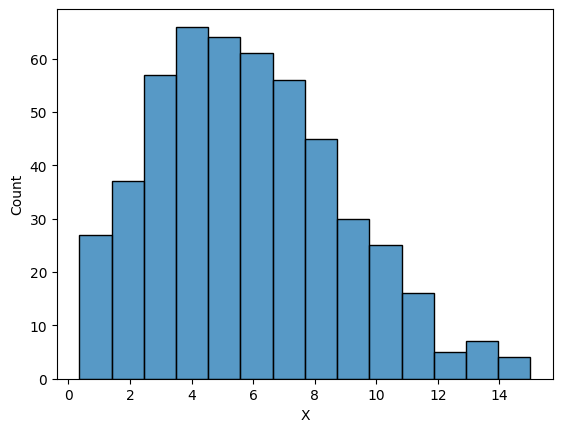

In [120]:
sns.histplot(Data,x='X')#Checking the distribution

In [121]:
#Check if any entry is less than zero, in that case we will drop them
Data[Data['X']<0]
#No data less than 0. so we can proceed

,X


Weibull distribution for k=2 is

$f(x;k=2,\lambda)=\frac{2x}{\lambda^2}e^{-\frac{x^2}{\lambda^2}}$

MLE of $\lambda$ :

$\hat{\lambda}^2=\frac{1}{n}\sum_{i=1}^{i=n}x_i^2$

In [122]:
#using this formula we first check the value of lambdahat
X=Data['X'].values
Lambda_hat=np.mean(X**2)**0.5
Lambda_hat

6.581546404774336

In [123]:
def Likelihood(param,data):
  """
  Expects a 1D numpy array

  """
  k=2
  pdf=(k/param)*((data/param)**(k-1))*np.exp(-(data**k/param**k))
  pdf[pdf<=0]=np.finfo(float).eps
  log_li=np.log(pdf)
  return -np.sum(log_li)

In [124]:
for i in range(1,5):
  sol = minimize(Likelihood,[i],Data['X'].values,method='L-BFGS-B')
  print("Guessing value is ",i)
  param=sol.x[0]
  print(f"ML estimate of lambda is {param}")

Guessing value is  1
ML estimate of lambda is 6.581546004221454
Guessing value is  2
ML estimate of lambda is 6.581545647451705
Guessing value is  3
ML estimate of lambda is 6.581545568305803
Guessing value is  4
ML estimate of lambda is 6.581546406655713


So we got our ML estimate of $\lambda$ almost same as theoretical formula = 6.58

In [125]:
def pdf_func(data):
  k=2
  pdf=(k*data/param**k)*np.exp(-((data**k)/(param**k)))
  return pdf

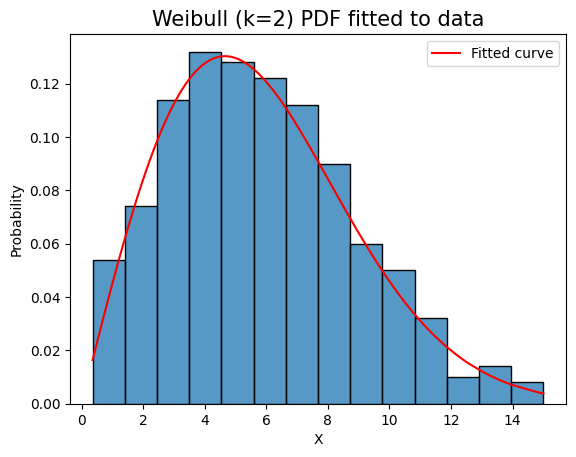

In [126]:
#Check if the Pdf fits the data
plt.plot(np.sort(Data['X'].values),pdf_func(np.sort(Data['X'].values)),color='r',label='Fitted curve')
sns.histplot(Data,x='X',stat='probability')
plt.title('Weibull (k=2) PDF fitted to data',fontsize=15)
plt.legend()
plt.show()

It is perfectly fitting the data

## Invariance Property :
States that for a function of parameter $\theta=f(\lambda)$ if MLE of $\lambda$ is $\hat{\lambda}$ then $\hat{\theta}=f(\hat{\lambda})$ is the MLE of $\lambda$ if f is one-one function having its inverse function existing.

We have $\sigma^2=\frac{\lambda^2}{2}$. So MLE is :

$\hat{\sigma}^2=\frac{\hat{\lambda}^2}{2}$

In [127]:
sigma=param/(2**0.5)
sigma

4.653856094840209

In [128]:
def likelihood(param,data):
  """
  Expects a 1D numpy array

  """
  pdf=(data/param**2)*np.exp(-(data**2/(2*param**2)))
  pdf[pdf<=0]=np.finfo(float).eps
  log_li=np.log(pdf)
  return -np.sum(log_li)

In [129]:
for i in range(1,5):
  sol = minimize(likelihood,[i],Data['X'].values,method='L-BFGS-B')
  print("Guessing value is ",i)
  param=sol.x[0]
  print(f"ML estimate of lambda is {param}")

Guessing value is  1
ML estimate of lambda is 4.6538558686151195
Guessing value is  2
ML estimate of lambda is 4.653856070101824
Guessing value is  3
ML estimate of lambda is 4.653855856340557
Guessing value is  4
ML estimate of lambda is 4.653855727615463


Again it matches our theoretical value

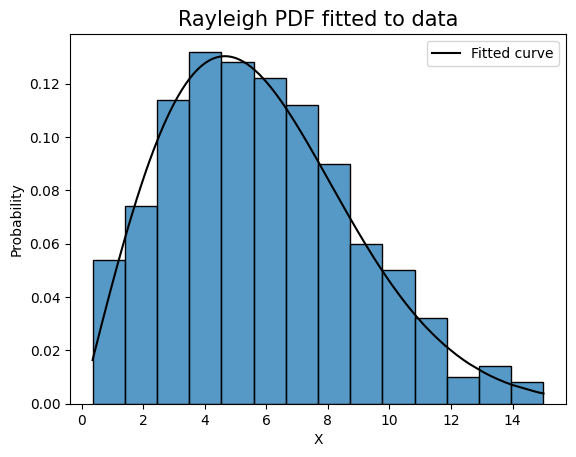

In [130]:
def pdf_func(data):
  pdf=(data/param**2)*np.exp(-((data**2)/(2*param**2)))
  return pdf
#Check if the Pdf fits the data
plt.plot(np.sort(Data['X'].values),pdf_func(np.sort(Data['X'].values)),color='black',label='Fitted curve')
sns.histplot(Data,x='X',stat='probability')
plt.title('Rayleigh PDF fitted to data',fontsize=15)
plt.legend()
plt.show()

This also fits the data
#End of Code